In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Measurements.csv")


In [3]:
df['speed'] = df['distance'] / df['time']

In [4]:
display(df.shape)
display(df.dtypes)

(55, 5)

time        float64
distance    float64
material     object
density     float64
speed       float64
dtype: object

In [5]:
# Create dataframe with averaged data for speed and distance
averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()
materials = df['material'].unique()

C:\Users\lukas\AppData\Local\Temp\ipykernel_6684\1370191864.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()


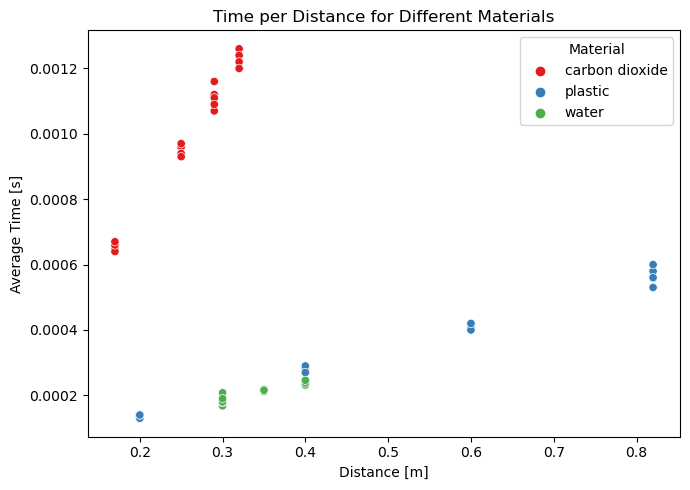

In [6]:
# Create subplots with two plots (line plot and boxplot) side by side
plt.figure(figsize = (7, 5))

# Plot 1: Scatterplot (average time per distance) with linear regression
sns.scatterplot(data=df, x='distance', y='time', hue='material', marker='o', palette='Set1')
plt.xlabel('Distance [m]')
plt.ylabel('Average Time [s]')
plt.title('Time per Distance for Different Materials')
plt.legend(title="Material", loc="best")

# Adjust the layout of subplots
plt.tight_layout()

# Show the plots
plt.show()